# Лабораторная работа 5

## Общая информация

**Дата выдачи**: 14.11.2022/18.11.2022

**Срок сдачи**: 28.11.2022/02.12.2022 *(Но требуется обязательная демонстрация текущего прогресса преподавателю во время лабораторного занятия 21.11.2022/25.12.2022)*

### О задании
Целью данного задания является приобретение навыков работы с изображениями, обучение и измерение качества моделей свёрточных нейронных сетей при помощи фреймворка *Keras*. 

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов.

Сдача заданий после указанного срока сдачи ведёт к снижению оценки.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

### Формат сдачи
Устная защита выполненной лабораторной работы ОБЯЗАТЕЛЬНА!

После успешной устной защиты переименуйте получившийся файл `*.ipynb` в соответствии со следующим форматом: *Username_lab_5.ipynb*, где Username — ваша фамилия на латинице (например, `lehusheu_lab_5.ipynb`) и отправьте этот файл электронной почтой по адресу `dmitri.legushev.bsu@gmail.com` c темой письма *Фамилия преподавателя - Лабораторная работа 5 - Фамилия Имя Отчество* (для обоих подгрупп). Подгруппа Атрохова Кирилла Георгиевича также ставит в копию адрес `kiryl.atrokhau+ml2022@gmail.com`. Это будет являться письменным отчетом о выполнении лабораторной работы.

Задача: Используя нейронные сети, создать модели, которые предсказывают какая цифра отображена на изображении.

Данные: MNIST

Подробнее о данных: https://en.wikipedia.org/wiki/MNIST_database


**1.** Загрузить данные с библиотеки keras MNIST.

`from keras.datasets import mnist` через функцию `load_data`

Распределить данные на тренировочную и валидационную выборки. Посчитать количество экземляров для каждого класса в тренировочной и валидационной выборке. Вычислить какую часть данных от всех составляет валидационная выборка. 

Вывести в виде изображения по одному примеру из каждого класса с указанием какая это цифра в заголовке.

`import matplotlib.pyplot as plt
plt.title(label)
plt.imshow(img)
`

**Tip:** https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

In [386]:
from keras.datasets import mnist
import keras
from keras import preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.activations import softmax, relu
# from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import regularizers
from tensorflow.keras.losses import CategoricalCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam,Adamax
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
from random import choice

In [2]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [3]:
train_len, test_len = len(X_train),len(X_test)

In [18]:
def show_symbol(rand_sample=None, rand_sample_symbol=None):
    if rand_sample is None:
        rand_index = np.random.randint(1,train_len)
        rand_sample,rand_sample_symbol = X_train[rand_index],y_train[rand_index]
        plt.figure()
        plt.imshow(rand_sample)
        plt.title(rand_sample_symbol)
        plt.show()
    elif hasattr(rand_sample_symbol, '__iter__'):
        for i in rand_sample_symbol:
            plt.figure()
            plt.imshow(rand_sample[i])
            plt.title(rand_sample_symbol[i])
            plt.show()
    else:
        plt.figure()
        plt.imshow(rand_sample)
        plt.title(rand_sample_symbol)
        plt.show()
    # return rand_sample,rand_sample_symbol

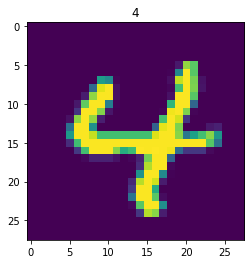

In [20]:
show_symbol()

**2.** Данные необходимо предобработать: поменять тип данных на *float32*, произвести *MinMax* нормализацию данных

In [63]:
X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train, X_test = X_train/255.0, X_test/255.0

In [174]:
X_train2, X_test2 = X_train.reshape(60000,28,28,1), X_test.reshape(10000,28,28,1)

In [87]:
def to_vector(target_lst, ohe = OneHotEncoder(sparse=False).fit(np.arange(0,10).reshape(-1,1))):
    if hasattr(target_lst,"__iter__"):
        return ohe.transform(target_lst.reshape(-1,1))
    return ohe.transform([[target_lst]])[0]

In [88]:
y_train,y_test = y_train.astype('float32'),y_test.astype('float32')

In [90]:
y_train2,y_test2 = to_vector(y_train), to_vector(y_test)

**3.** Постройте несколько архтектур нейронных сетей (!После каждого эксперимента построить графики функции потерь и метрик):

* Три полносвязных слоя
* Один сверточный слой, один полносвязный
* Два сверточных слоя, один полносвязный
* Три сверточных слоя, один полносвязный
* Два сверточных слоя, два полносвязных
* На лучшую архитектуру дополнительно добавить между слоями:
    * *MaxPooling*
    * *Dropout*
    * *BatchNormalization*
* Обучит модели и подобрать архитектуру с наилучшим скором на валидационной выборке (`model.evaluate`)

`from keras.layers impot Dense, Conv2D, Flatten, BatchNormalization ...`


* Обучать свёрточные слои с числом фильтров (16, 32, 64)
* Обучать свёрточные слои с padding *same*
* Размер пулингового окна 3х3
* Функции активации в слоях *ReLU*
* Обучать модели с оптимизаторами лосса *SGD* или *Adam*
* Обучать модели с падением скорости обучения (learning rate) в оптимизаторах лоса по технике step decay
* Обучать модели числом эпох 15, 20, 30

**Tip:** Важно встроить в модель Flatten слой после сверточных.

### Три полносвязных слоя

In [250]:
model = Sequential([
    Dense(128,input_shape = X_train[0].shape, activation=relu),
    Dense(128, activation=relu),
    Flatten(),
    Dense(10,activation=softmax)
])

In [251]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train, y_train2, epochs=12, batch_size=40,verbose=1,validation_split=0.1)

Epoch 1/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.2473 - accuracy: 0.9260 - val_loss: 0.1249 - val_accuracy: 0.9650
Epoch 2/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.1279 - accuracy: 0.9615 - val_loss: 0.1113 - val_accuracy: 0.9698
Epoch 3/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.1064 - accuracy: 0.9679 - val_loss: 0.0937 - val_accuracy: 0.9747
Epoch 4/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0940 - accuracy: 0.9715 - val_loss: 0.1000 - val_accuracy: 0.9707
Epoch 5/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.0842 - accuracy: 0.9745 - val_loss: 0.0993 - val_accuracy: 0.9725
Epoch 6/20
1350/1350 [==============================] - 6s 5ms/step - loss: 0.0758 - accuracy: 0.9763 - val_loss: 0.1039 - val_accuracy: 0.9687
Epoch 7/20
1350/1350 [==============================] - 6s 4ms/step - loss: 0.0681 - accuracy: 0.9788 - val_loss: 0.1002 - val_accuracy:

KeyboardInterrupt: 

In [254]:
res = model.evaluate(X_test,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1389 - accuracy: 0.9686
accuracy =  0.9685999751091003


In [255]:
tmp = model.predict(X_test)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 1s 2ms/step


,0,1,2,3,4,5,6,7,8,9
0,972,0,4,0,1,4,13,0,10,2
1,0,1119,3,0,0,1,2,5,0,5
2,2,6,996,18,3,2,1,14,4,4
3,1,0,7,955,1,13,0,5,4,7
4,0,0,4,0,962,1,3,5,1,9
5,1,1,0,16,0,853,5,0,1,4
6,1,2,0,0,0,7,931,0,0,0
7,1,5,6,10,0,1,0,985,4,5
8,2,2,10,2,2,4,3,1,944,4
9,0,0,2,9,13,6,0,13,6,969


### Один сверточный слой, один полносвязный

In [275]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape = X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(10,activation=softmax)
])

In [281]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train2, y_train2, epochs=5, batch_size=30,verbose=1,validation_split=0.1)

Epoch 1/5
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0686 - val_accuracy: 0.9842
Epoch 2/5
1800/1800 [==============================] - 17s 9ms/step - loss: 0.0179 - accuracy: 0.9951 - val_loss: 0.0742 - val_accuracy: 0.9835
Epoch 3/5
1800/1800 [==============================] - 18s 10ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.0814 - val_accuracy: 0.9833
Epoch 4/5
1800/1800 [==============================] - 19s 11ms/step - loss: 0.0125 - accuracy: 0.9968 - val_loss: 0.0773 - val_accuracy: 0.9833
Epoch 5/5
1800/1800 [==============================] - 22s 12ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.0858 - val_accuracy: 0.9835


In [282]:
res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9814
accuracy =  0.9814000129699707


In [283]:
tmp = model.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 1s 4ms/step


,0,1,2,3,4,5,6,7,8,9
0,970,0,2,0,0,2,4,0,4,3
1,0,1125,3,0,2,1,2,5,1,2
2,3,3,1012,4,1,2,2,9,3,2
3,1,1,2,997,0,7,0,6,1,10
4,0,1,0,0,968,0,2,0,0,7
5,1,0,0,3,0,873,1,0,3,4
6,3,2,1,0,3,5,942,0,1,0
7,0,1,6,1,0,1,0,1001,3,4
8,2,2,5,5,1,1,5,4,954,5
9,0,0,1,0,7,0,0,3,4,972


### Два сверточных слоя, один полносвязный

In [284]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(10,activation=softmax)
])

In [285]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train2, y_train2, epochs=5, batch_size=30,verbose=1, validation_split=0.1)

Epoch 1/5
1800/1800 [==============================] - 64s 35ms/step - loss: 0.1410 - accuracy: 0.9599 - val_loss: 0.0668 - val_accuracy: 0.9833
Epoch 2/5
1800/1800 [==============================] - 64s 36ms/step - loss: 0.0612 - accuracy: 0.9829 - val_loss: 0.0525 - val_accuracy: 0.9867
Epoch 3/5
1800/1800 [==============================] - 66s 37ms/step - loss: 0.0440 - accuracy: 0.9882 - val_loss: 0.0536 - val_accuracy: 0.9878
Epoch 4/5
1800/1800 [==============================] - 67s 37ms/step - loss: 0.0323 - accuracy: 0.9915 - val_loss: 0.0601 - val_accuracy: 0.9865
Epoch 5/5
1800/1800 [==============================] - 68s 38ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.0599 - val_accuracy: 0.9857


In [286]:
res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0557 - accuracy: 0.9864
accuracy =  0.9864000082015991


In [287]:
tmp = model.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 3s 8ms/step


,0,1,2,3,4,5,6,7,8,9
0,974,0,1,0,0,1,6,0,2,1
1,0,1134,8,0,2,0,3,2,2,4
2,2,0,1011,1,0,0,1,3,4,1
3,2,0,1,1006,1,16,0,2,1,8
4,0,0,2,0,970,0,1,1,0,6
5,0,0,0,2,0,871,2,0,0,4
6,2,0,1,0,3,1,943,0,3,0
7,0,1,7,1,2,1,0,1019,3,4
8,0,0,1,0,0,1,2,1,956,1
9,0,0,0,0,4,1,0,0,3,980


### Три сверточных слоя, один полносвязный

In [289]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(10,activation=softmax)
])

In [290]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train2, y_train2, epochs=10, batch_size=30,verbose=1, validation_split=0.1)

Epoch 1/10
1800/1800 [==============================] - 131s 73ms/step - loss: 0.1324 - accuracy: 0.9614 - val_loss: 0.0629 - val_accuracy: 0.9855
Epoch 2/10
1800/1800 [==============================] - 130s 72ms/step - loss: 0.0557 - accuracy: 0.9858 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 3/10
1800/1800 [==============================] - 134s 74ms/step - loss: 0.0399 - accuracy: 0.9893 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 4/10
1800/1800 [==============================] - 132s 73ms/step - loss: 0.0314 - accuracy: 0.9924 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 5/10
1800/1800 [==============================] - 129s 72ms/step - loss: 0.0235 - accuracy: 0.9948 - val_loss: 0.0543 - val_accuracy: 0.9907
Epoch 6/10
1800/1800 [==============================] - 132s 73ms/step - loss: 0.0207 - accuracy: 0.9958 - val_loss: 0.0522 - val_accuracy: 0.9895
Epoch 7/10
1800/1800 [==============================] - 130s 72ms/step - loss: 0.0185 - accuracy: 0.9962 - val_loss: 0

In [293]:
res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0591 - accuracy: 0.9865
accuracy =  0.9865000247955322


In [294]:
tmp = model.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 4s 12ms/step


,0,1,2,3,4,5,6,7,8,9
0,970,0,1,0,0,2,2,0,3,2
1,0,1131,3,1,1,1,3,4,0,2
2,2,1,1015,1,0,1,0,6,1,1
3,0,1,0,1005,0,6,0,3,1,5
4,2,0,2,0,973,1,4,0,0,6
5,0,0,0,2,0,876,5,0,1,6
6,5,2,2,0,2,3,942,0,0,0
7,0,0,6,0,1,0,0,1013,3,8
8,1,0,3,1,2,2,2,1,963,2
9,0,0,0,0,3,0,0,1,2,977


### Два сверточных слоя, два полносвязных

In [296]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(50, activation=relu, kernel_regularizer=L2(1e-4)),
    Dense(10, activation=softmax)
])

In [300]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train2, y_train2, epochs=5, batch_size=30,verbose=1, validation_split=0.1)

Epoch 1/5
1800/1800 [==============================] - 69s 38ms/step - loss: 0.0661 - accuracy: 0.9896 - val_loss: 0.0792 - val_accuracy: 0.9887
Epoch 2/5
1800/1800 [==============================] - 68s 38ms/step - loss: 0.0611 - accuracy: 0.9917 - val_loss: 0.0813 - val_accuracy: 0.9872
Epoch 3/5
1800/1800 [==============================] - 69s 38ms/step - loss: 0.0612 - accuracy: 0.9915 - val_loss: 0.0813 - val_accuracy: 0.9877
Epoch 4/5
1800/1800 [==============================] - 69s 38ms/step - loss: 0.0588 - accuracy: 0.9922 - val_loss: 0.0938 - val_accuracy: 0.9880
Epoch 5/5
1800/1800 [==============================] - 71s 39ms/step - loss: 0.0577 - accuracy: 0.9923 - val_loss: 0.0896 - val_accuracy: 0.9855


In [301]:
res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0836 - accuracy: 0.9847
accuracy =  0.9847000241279602


In [302]:
tmp = model.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test), columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 3s 8ms/step


,0,1,2,3,4,5,6,7,8,9
0,975,1,4,0,0,2,5,0,3,1
1,0,1129,0,0,0,0,1,4,0,4
2,0,1,1013,2,0,0,0,10,2,0
3,1,2,3,984,0,3,0,1,0,0
4,0,0,2,0,970,0,1,1,0,7
5,0,0,0,12,0,878,3,0,0,1
6,3,1,1,0,4,5,947,0,2,0
7,1,0,4,2,0,1,0,994,0,0
8,0,1,5,6,3,2,1,2,964,3
9,0,0,0,4,5,1,0,16,3,993


### Два сверточных слоя, два полносвязных

In [303]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(50, activation=relu, kernel_regularizer=L2(1e-4)),
    Dense(50, activation=relu, kernel_regularizer=L2(1e-4)),
    Dense(10, activation=softmax)
])

In [304]:
model2.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model2.fit(X_train2, y_train2, epochs=10, batch_size=30,verbose=1, validation_split=0.1)

Epoch 1/5
1800/1800 [==============================] - 71s 39ms/step - loss: 0.1907 - accuracy: 0.9525 - val_loss: 0.1143 - val_accuracy: 0.9782
Epoch 2/5
1800/1800 [==============================] - 71s 40ms/step - loss: 0.1053 - accuracy: 0.9811 - val_loss: 0.1088 - val_accuracy: 0.9822
Epoch 3/5
1800/1800 [==============================] - 71s 39ms/step - loss: 0.0939 - accuracy: 0.9846 - val_loss: 0.0954 - val_accuracy: 0.9868
Epoch 4/5
1800/1800 [==============================] - 74s 41ms/step - loss: 0.0845 - accuracy: 0.9876 - val_loss: 0.1042 - val_accuracy: 0.9837
Epoch 5/5
1800/1800 [==============================] - 75s 42ms/step - loss: 0.0767 - accuracy: 0.9890 - val_loss: 0.1085 - val_accuracy: 0.9792


In [305]:
res = model2.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0987 - accuracy: 0.9821
accuracy =  0.9821000099182129


In [306]:
tmp = model2.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test), columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 3s 8ms/step


,0,1,2,3,4,5,6,7,8,9
0,968,0,1,0,0,2,2,0,2,0
1,0,1131,6,0,0,0,4,1,1,3
2,0,0,994,0,0,0,0,1,5,0
3,0,0,1,1001,0,14,0,4,6,0
4,4,0,1,0,967,0,4,0,6,4
5,0,1,0,4,0,868,2,0,1,2
6,6,0,0,0,1,2,946,0,4,0
7,0,1,25,4,1,0,0,1019,3,5
8,1,2,3,1,0,1,0,1,932,0
9,1,0,1,0,13,5,0,2,14,995


#### в качестве лучшей архитектуры буду использовать 2 conv и 1 dense

In [311]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(10,activation=softmax),
    Dropout(0.2)
])

In [312]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train2, y_train2, epochs=20, batch_size=30,verbose=1, validation_split=0.1)

Epoch 1/20
1800/1800 [==============================] - 33s 17ms/step - loss: 3.3125 - accuracy: 0.7628 - val_loss: 0.0687 - val_accuracy: 0.9815
Epoch 2/20
1800/1800 [==============================] - 31s 17ms/step - loss: 3.2848 - accuracy: 0.7832 - val_loss: 0.0517 - val_accuracy: 0.9865
Epoch 3/20
1800/1800 [==============================] - 31s 17ms/step - loss: 3.2597 - accuracy: 0.7866 - val_loss: 0.0570 - val_accuracy: 0.9860
Epoch 4/20
1800/1800 [==============================] - 31s 17ms/step - loss: 3.2983 - accuracy: 0.7864 - val_loss: 0.0816 - val_accuracy: 0.9785
Epoch 5/20
1800/1800 [==============================] - 31s 17ms/step - loss: 3.2933 - accuracy: 0.7881 - val_loss: 0.0463 - val_accuracy: 0.9888
Epoch 6/20
1800/1800 [==============================] - 32s 18ms/step - loss: 3.2661 - accuracy: 0.7896 - val_loss: 0.0489 - val_accuracy: 0.9883
Epoch 7/20
1800/1800 [==============================] - 32s 18ms/step - loss: 3.2464 - accuracy: 0.7911 - val_loss: 0.0457 -

In [313]:
res = model.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0393 - accuracy: 0.9902
accuracy =  0.9901999831199646


In [314]:
tmp = model.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 2s 5ms/step


,0,1,2,3,4,5,6,7,8,9
0,978,0,2,0,0,0,3,0,2,0
1,0,1135,6,1,1,0,4,14,0,4
2,0,0,1017,1,0,0,0,3,2,0
3,0,0,0,1004,0,4,0,0,1,0
4,0,0,0,0,976,0,3,0,0,6
5,0,0,0,2,0,886,4,0,1,5
6,1,0,1,0,0,1,943,0,0,0
7,1,0,4,1,0,1,0,1009,1,5
8,0,0,2,1,0,0,1,1,965,0
9,0,0,0,0,5,0,0,1,2,989


In [320]:
model.save("bestmodel")

INFO:tensorflow:Assets written to: bestmodel\assets


INFO:tensorflow:Assets written to: bestmodel\assets


In [361]:
model2 = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=X_train2[0].shape, activation=relu,kernel_regularizer=L2(1e-5)),
    Dropout(0.1),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-5)),
    Dropout(0.1),
    MaxPooling2D(),
    BatchNormalization(),
    Flatten(),
    Dense(10, activation=softmax)
])

In [ ]:
model2.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model2.fit(X_train2, y_train2, epochs=20, batch_size=30,verbose=1, validation_split=0.1)

In [ ]:
res = model2.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

In [364]:
tmp = model2.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 4s 13ms/step


,0,1,2,3,4,5,6,7,8,9
0,978,0,1,0,0,2,3,0,2,0
1,0,1134,3,0,1,0,3,2,0,0
2,1,0,1010,3,0,1,1,0,2,0
3,0,0,0,1003,0,4,0,0,0,0
4,0,0,0,0,969,0,1,0,0,3
5,0,0,0,2,0,882,1,1,0,1
6,0,0,1,0,2,2,946,0,0,0
7,1,0,16,1,0,0,0,1021,0,4
8,0,0,1,1,0,0,3,2,968,2
9,0,1,0,0,10,1,0,2,2,999


In [352]:
model2.save("bestmodel24")

INFO:tensorflow:Assets written to: bestmodel24\assets


INFO:tensorflow:Assets written to: bestmodel24\assets


**4.** Вывести в виде изображения по одному примеру из каждого класса с указанием результата работы лучшей модели в заголовке

**Tip:** https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html

In [365]:
bestmodel = keras.models.load_model('bestmodel24')

In [368]:
res = bestmodel.evaluate(X_test2,y_test2)
print('accuracy = ', res[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.0411 - accuracy: 0.9926
accuracy =  0.9926000237464905


In [369]:
tmp = model2.predict(X_test2)
result = [np.where(i==np.max(i))[0][0] for i in tmp]
pd.DataFrame(confusion_matrix(result,y_test),columns=list(range(10)),index = list(range(10)))

313/313 [==============================] - 4s 13ms/step


,0,1,2,3,4,5,6,7,8,9
0,978,0,1,0,0,2,3,0,2,0
1,0,1134,3,0,1,0,3,2,0,0
2,1,0,1010,3,0,1,1,0,2,0
3,0,0,0,1003,0,4,0,0,0,0
4,0,0,0,0,969,0,1,0,0,3
5,0,0,0,2,0,882,1,1,0,1
6,0,0,1,0,2,2,946,0,0,0
7,1,0,16,1,0,0,0,1021,0,4
8,0,0,1,1,0,0,3,2,968,2
9,0,1,0,0,10,1,0,2,2,999


In [413]:
tmp = bestmodel.predict(np.array([X_test2[index]]))
ohe.inverse_transform([(tmp[0]==np.max(tmp[0])).astype('int')])[0][0]

1/1 [==============================] - 0s 33ms/step


9

1/1 [==============================] - 0s 29ms/step


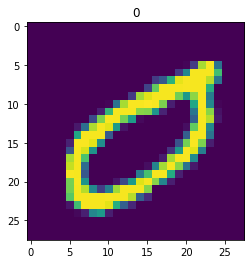

1/1 [==============================] - 0s 27ms/step


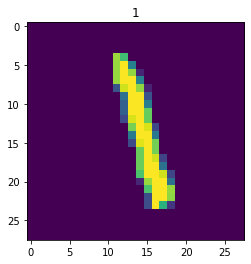

1/1 [==============================] - 0s 24ms/step


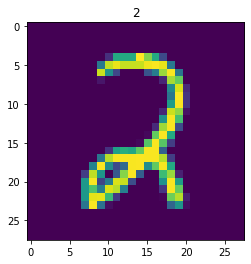

1/1 [==============================] - 0s 25ms/step


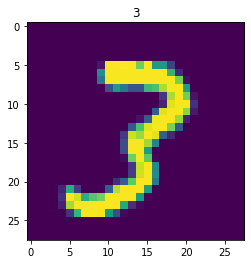

1/1 [==============================] - 0s 26ms/step


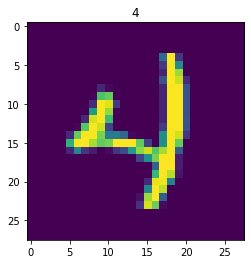

1/1 [==============================] - 0s 35ms/step


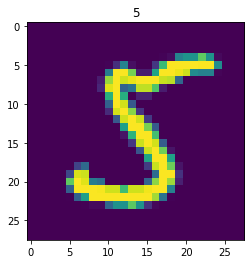

1/1 [==============================] - 0s 28ms/step


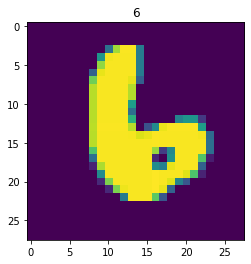

1/1 [==============================] - 0s 24ms/step


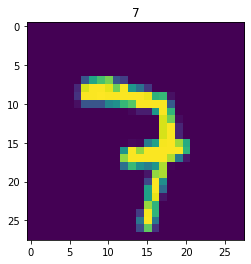

1/1 [==============================] - 0s 26ms/step


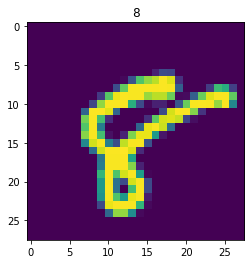

1/1 [==============================] - 0s 25ms/step


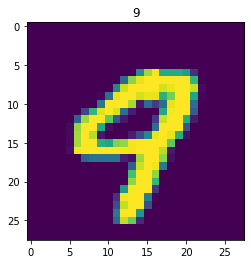

In [420]:
for i in range(10):
    index = choice(np.where(y_test==i)[0])
    sample = X_test2[index]
    tmp = bestmodel.predict(np.array([sample]))
    show_symbol(sample,ohe.inverse_transform([(tmp[0]==np.max(tmp[0])).astype('int')])[0][0])

Help links:

- https://keras.io/about/
- https://keras.io/guides/sequential_model/
- https://keras.io/api/layers/
- https://keras.io/api/callbacks/
- https://keras.io/api/optimizers/
- https://keras.io/api/losses/
- https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5